In [6]:
import numpy as np

In [7]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [8]:
points.shape

(9, 2)

In [9]:
p = np.array([2.5,2])

In [10]:
def distance(p1,p2):
    """Calculates the Eucledian distance between 2 points.
    p1 and p2 are inputs which are the points to determine the distance within them.
    The output is the distance between these two points."""
    import numpy as np
    p1 = np.array(p1)
    p2 = np.array(p2)
    diff = abs(p1-p2)
    inner =np.power(diff,2)
    distance  = np.sqrt(sum(inner))
    return distance

In [11]:
distances = np.zeros(points.shape[0]) #the number of rows will be same. columns won't be needed.

In [12]:
for i in range(0,len(points)):
    distances[i]=distance(p,points[i])

In [13]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [14]:
ind = np.argsort(distances)

In [15]:
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [16]:
distances[ind] # sorted

array([0.5       , 0.5       , 1.11803399, 1.11803399, 1.11803399,
       1.11803399, 1.5       , 1.80277564, 1.80277564])

In [17]:
def find_nearest_neighbor(p,points,k=5):
    """Find the k nearest neighbors of the point p and return their indices"""
    distances = np.zeros(points.shape[0])
    for i in range(0,len(points)):
        distances[i]=distance(points[i],p)
    ind = np.argsort(distances)
    return ind[:k]
    
    

In [18]:
ind = find_nearest_neighbor(p,points,k=4)

In [19]:
ind

array([4, 7, 3, 5])

In [20]:
points[ind]

array([[2, 2],
       [3, 2],
       [2, 1],
       [2, 3]])

In [21]:
import matplotlib.pyplot as plt

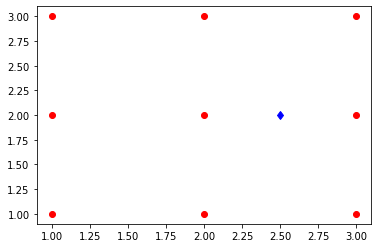

In [22]:
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bd")

In [103]:
def majority_vote(arr):
    """Shows the most common element of an array,
    i.e. which elements occurs the most in the array."""
    from collections import Counter
    majors = []
    for key,value in Counter(arr).items():
        if value ==max(Counter(arr).values()):
            majors.append(key)
    
    if len(majors)>1:
        import random
        return random.choice(majors)
    else:
        return majors[0]

#### Predicting the class of the point p

In [104]:
def knn_predict(p,points,outcomes,k=5):
    ind = find_nearest_neighbor(p,points,k)
    return majority_vote(outcomes[ind])
    
    

In [25]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [105]:
knn_predict(p,points,outcomes,k=3)

0

In [106]:
knn_neighbors(np.array([1.0,2.1]),points,outcomes, k = 7)

0

## Generating synthetic data

In [28]:
import scipy.stats as ss
import numpy as np

In [29]:
a = ss.norm(0,1).rvs((5,2))

In [30]:
a # belongs to class 0

array([[-1.23119357, -0.08999331],
       [ 0.05509291,  0.11580312],
       [ 0.54751917,  0.7584073 ],
       [-0.42588903,  1.46671811],
       [ 1.70765649,  0.58023645]])

In [31]:
b = ss.norm((1,1)).rvs((5,2))

In [32]:
b # belongs to class 1

array([[1.17990566, 0.05872254],
       [0.86345792, 1.50594642],
       [0.22158145, 0.00815512],
       [2.74776891, 1.4224934 ],
       [0.8370821 , 0.1271228 ]])

In [38]:
a

array([[-1.23119357, -0.08999331],
       [ 0.05509291,  0.11580312],
       [ 0.54751917,  0.7584073 ],
       [-0.42588903,  1.46671811],
       [ 1.70765649,  0.58023645]])

In [39]:
b

array([[1.17990566, 0.05872254],
       [0.86345792, 1.50594642],
       [0.22158145, 0.00815512],
       [2.74776891, 1.4224934 ],
       [0.8370821 , 0.1271228 ]])

In [42]:
a

array([[-1.23119357, -0.08999331],
       [ 0.05509291,  0.11580312],
       [ 0.54751917,  0.7584073 ],
       [-0.42588903,  1.46671811],
       [ 1.70765649,  0.58023645]])

In [43]:
b

array([[1.17990566, 0.05872254],
       [0.86345792, 1.50594642],
       [0.22158145, 0.00815512],
       [2.74776891, 1.4224934 ],
       [0.8370821 , 0.1271228 ]])

In [44]:
np.concatenate((a,b),axis = 0)

array([[-1.23119357, -0.08999331],
       [ 0.05509291,  0.11580312],
       [ 0.54751917,  0.7584073 ],
       [-0.42588903,  1.46671811],
       [ 1.70765649,  0.58023645],
       [ 1.17990566,  0.05872254],
       [ 0.86345792,  1.50594642],
       [ 0.22158145,  0.00815512],
       [ 2.74776891,  1.4224934 ],
       [ 0.8370821 ,  0.1271228 ]])

In [107]:
def generate__synth_data(n=50):
    """return data points from bivariate normal distribution."""#n = no. of points we are generating

    a = ss.norm(0,1).rvs((n,2))
    b =ss.norm(1,1).rvs((n,2))
    points = np.concatenate((a,b),axis = 0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return points,outcomes

In [53]:
points,outcomes = generate__synth_data(n = 30)

In [56]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Plotting these data-

In [60]:
%matplotlib widget

plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")# first n points for class 0
plt.plot(points[n:,0],points[n:,1],"bo") # first n points for class 1
# plt.savefig("bivariate.pdf")
    


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Making a prediction grid

In [108]:
def make_prediction_grid(predictors, outcomes, limits,h,k):
    """Classify each point on the prediction grid"""
    (x_min,x_max,y_min,y_max)=limits
    xs = np.arange(x_min,x_max,h)
    ys = np.arange(y_min,y_max,h)
    xx,yy = np.meshgrid(xs,ys)
    prediction_grid = np.zeros(xx.shape,dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors,outcomes,k)
    return (xx,yy,prediction_grid)
    

In [65]:
x= np.arange(0,1,0.2)
y = np.arange(2,3,0.2)

In [66]:
x

array([0. , 0.2, 0.4, 0.6, 0.8])

In [67]:
y

array([2. , 2.2, 2.4, 2.6, 2.8])

In [68]:
xx,yy = np.meshgrid(x,y)

In [109]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

# The whole process-

In [120]:
(predictors,outcomes)=generate__synth_data()

In [121]:
predictors.shape

(100, 2)

In [122]:
outcomes.shape


(100,)

In [132]:
k = 30;filename = "knn_synth_30.pdf";limits = (-3,4,-3,4);h = 0.1

In [137]:
xx,yy,prediction_grid = make_prediction_grid(predictors,outcomes,limits,h,k)


In [134]:
plot_prediction_grid(xx,yy,prediction_grid,filename)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [139]:
k = 10;filename = "knn_synth_10.pdf";limits = (-3,4,-3,4);h = 0.1
xx,yy,prediction_grid = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Comparing scikit learn and our own KNN classifier

In [140]:
from sklearn import datasets

In [141]:
iris = datasets.load_iris()

In [142]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [143]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [147]:
predictors = iris.data[:,0:2]
outcomes = iris.target

In [148]:
outcomes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [151]:
plt.figure()
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"bo")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"go")
plt.show()
plt.savefig("iris.pdf")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [153]:
k = 5;filename = "iris_grid.pdf";limits = (4,8,1.5,4.5);h = 0.1
xx,yy,prediction_grid = make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn =  KNeighborsClassifier(n_neighbors = 5)

In [167]:
knn.fit(predictors,outcomes)
sk_predictors = knn.predict(predictors)

In [168]:
sk_predictors[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [165]:
my_predictions = np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

In [166]:
my_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [171]:
100*np.mean(sk_predictors == my_predictions) # my predictions match with sklearn predictions approx 96 per cent times.

96.0

In [172]:
100*np.mean(sk_predictors == outcomes)

83.33333333333334

In [173]:
100*np.mean(my_predictions == outcomes)

84.66666666666667